In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.5.0'

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

# PREPROCESSING AND READING IMAGES

In [4]:
#training data
#augmentation
#shear range:Shear angle in counter-clockwise direction in degrees
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                vertical_flip=True,
                                horizontal_flip=True
                                )

In [6]:
training_set=train_datagen.flow_from_directory(r'C:\Users\HP-PC\Desktop\Animal Classifier FINAL\Real dataset\train',
                                              target_size=(224,224),class_mode='categorical',batch_size=16)

Found 18284 images belonging to 10 classes.


In [7]:
#validation data
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory(r'C:\Users\HP-PC\Desktop\Animal Classifier FINAL\Real dataset\val',
                                         target_size=(224,224),class_mode='categorical',batch_size=16)

Found 7894 images belonging to 10 classes.


# VISUALIZING SOME PICTURES

In [9]:
train = tf.keras.preprocessing.image_dataset_from_directory(r'C:\Users\HP-PC\Desktop\Animal Classifier FINAL\Real dataset\train',
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                               batch_size=16)

Found 18284 files belonging to 10 classes.


In [10]:
classes=["butterfly","cat","chicken","cow","dog","elephant","horse","sheep","spider","squirrel"]

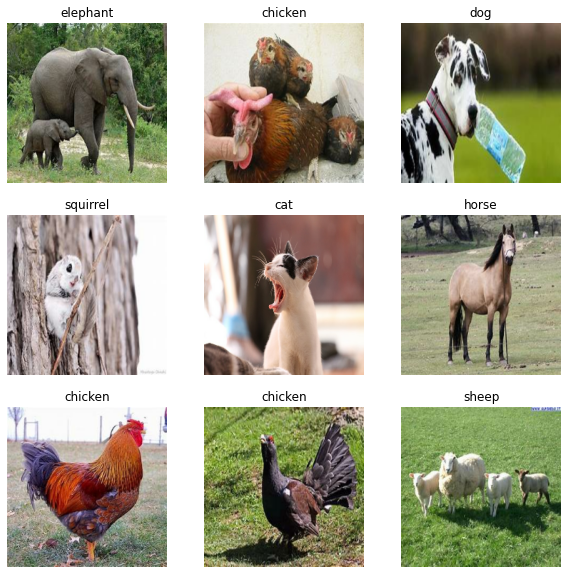

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")

# BUILDING CNN MODEL

In [23]:
#initializing the cnn
#layers will run in sequential
cnn=tf.keras.models.Sequential()
#Conv2D creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
#Activation function Applied to node inputs to produce node output
#loss function Measure of model's predictive performance,Aggregates errors in predictions
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
# max pooling -> feature extraction,reduce dimension
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
#converts the pooled feature map to a single column
cnn.add(tf.keras.layers.Flatten())
#A Dense layer feeds all outputs from the previous layer to all its neurons
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
#softmax function-> probability 0-1 
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# TRAINING

In [9]:
#Optimizers are algorithms or methods used to change the attributes of your neural network
#such as weights and learning rate in order to reduce the losses
#categorical crossentropy for multiple classes
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
graph1=cnn.fit(x=training_set,validation_data=test_set,epochs=20)

Epoch 1/20
1143/1143 [==============================] - 1285s 1s/step - loss: 1.9101 - accuracy: 0.3426 - val_loss: 1.7605 - val_accuracy: 0.3909
Epoch 2/20
1143/1143 [==============================] - 847s 741ms/step - loss: 1.6057 - accuracy: 0.4382 - val_loss: 1.6074 - val_accuracy: 0.4505
Epoch 3/20
1143/1143 [==============================] - 921s 806ms/step - loss: 1.4770 - accuracy: 0.4858 - val_loss: 1.5091 - val_accuracy: 0.4864
Epoch 4/20
1143/1143 [==============================] - 880s 770ms/step - loss: 1.3936 - accuracy: 0.5189 - val_loss: 1.5548 - val_accuracy: 0.4728
Epoch 5/20
1143/1143 [==============================] - 817s 715ms/step - loss: 1.3188 - accuracy: 0.5467 - val_loss: 1.4726 - val_accuracy: 0.4902
Epoch 6/20
1143/1143 [==============================] - 833s 728ms/step - loss: 1.2582 - accuracy: 0.5686 - val_loss: 1.4549 - val_accuracy: 0.5079
Epoch 7/20
1143/1143 [==============================] - 962s 842ms/step - loss: 1.1990 - accuracy: 0.5853 - val_lo

# SAVING TRAINED MODEL

In [10]:
graph1.model.save(r'C:\Users\HP-PC\Desktop\Animal Classifier\Real dataset\model\model-20.h5')

# LOADING TRAINED MODEL

In [15]:
model=tf.keras.models.load_model(r'C:\Users\HP-PC\Desktop\Animal Classifier FINAL\Real dataset\model\model-20.h5')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# VISUALIZING ACCURACIES

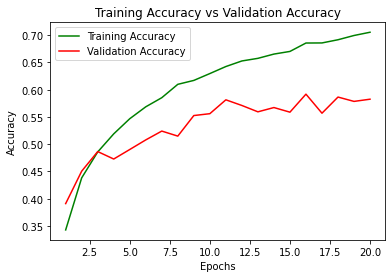

In [13]:
import matplotlib.pyplot as plt
acc_train=graph1.history['accuracy']
acc_val=graph1.history['val_accuracy']
epochs=range(1,21)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'r',label='Validation Accuracy')
plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

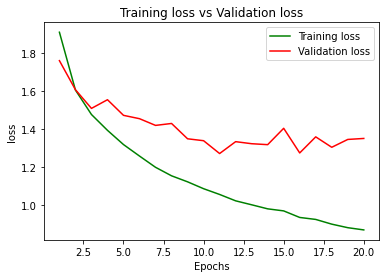

In [14]:
import matplotlib.pyplot as plt
loss_train=graph1.history['loss']
loss_val=graph1.history['val_loss']
epochs=range(1,21)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'r',label='Validation loss')
plt.title("Training loss vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# RESULT

In [12]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
print(classes)

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


# ACCURACY OF TRAINING SET

In [19]:
model.evaluate(training_set)

1143/1143 [==============================] - 816s 714ms/step - loss: 0.8209 - accuracy: 0.7204


[0.8209179043769836, 0.7204265594482422]

# ACCURACY OF VALIDATION DATA

In [17]:
model.evaluate(test_set)

494/494 [==============================] - 248s 494ms/step - loss: 1.3509 - accuracy: 0.5826


[1.350918173789978, 0.5825943946838379]

[[9.7196013e-01 1.5679692e-04 1.7136386e-02 1.1887479e-05 2.8028095e-04
  1.7407968e-06 1.3868432e-04 5.5110231e-05 1.0202454e-02 5.6489811e-05]]
0


<function matplotlib.pyplot.show(close=None, block=None)>

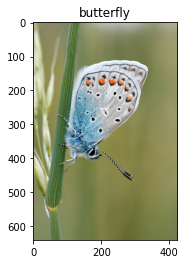

In [18]:
test_image=r'C:\Users\HP-PC\Desktop\Animal Classifier FINAL\Real dataset\test\butterfly\B2.jpg'
save_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224,3))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)
result=np.argmax(result)
print(result)
classname=classes[result]
plt.imshow(save_image)
plt.title(classes[result])
plt.show

# CONFUSION MATRIX and CLASSIFICATION REPORT ON TEST DATA

In [229]:
ftest_generator = ImageDataGenerator(rescale=1./255)
ftest_data_generator = ftest_generator.flow_from_directory(
    r'C:\Users\HP-PC\Desktop\AI PROJECT\Animal Classifier\Real dataset\test',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=16,
    )

Found 50 images belonging to 10 classes.


In [237]:
model.evaluate(ftest_data_generator)

4/4 [==============================] - 2s 500ms/step - loss: 1.0340 - accuracy: 0.7200


[1.0339807271957397, 0.7200000286102295]

In [230]:
preclass=[0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,2,4,2,5,5,5,7,5,7,7,6,9,6,7,7,7,8,7,0,0,6,0,8,9,7,8,9,8]

In [233]:
realclasses = ftest_data_generator.classes
realclasslabels = list(ftest_data_generator.class_indices.keys())   

In [234]:
report1 = metrics.classification_report(realclasses, preclass, target_names=realclasslabels)
print(report1)  

              precision    recall  f1-score   support

   butterfly       0.62      1.00      0.77         5
         cat       1.00      1.00      1.00         5
     chicken       0.71      1.00      0.83         5
         cow       1.00      1.00      1.00         5
         dog       1.00      0.60      0.75         5
    elephant       1.00      0.80      0.89         5
       horse       0.67      0.40      0.50         5
       sheep       0.50      0.80      0.62         5
      spider       0.25      0.20      0.22         5
    squirrel       0.67      0.40      0.50         5

    accuracy                           0.72        50
   macro avg       0.74      0.72      0.71        50
weighted avg       0.74      0.72      0.71        50



In [235]:
confusion_matrix = metrics.confusion_matrix(y_true=realclasses, y_pred=preclass)

In [236]:
confusion_matrix

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 4, 1, 0],
       [3, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 2, 2]], dtype=int64)

# FINE TUNING

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
initial_epochs = 20
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(training_set,
                         epochs=total_epochs,
                         initial_epoch=20,
                         validation_data=test_set)

Epoch 21/40
1143/1143 [==============================] - 1319s 1s/step - loss: 0.8657 - accuracy: 0.7079 - val_loss: 1.2926 - val_accuracy: 0.5888
Epoch 22/40
1143/1143 [==============================] - 985s 862ms/step - loss: 0.8494 - accuracy: 0.7097 - val_loss: 1.3302 - val_accuracy: 0.5839
Epoch 23/40
1143/1143 [==============================] - 945s 826ms/step - loss: 0.8296 - accuracy: 0.7205 - val_loss: 1.2749 - val_accuracy: 0.5920
Epoch 24/40
1143/1143 [==============================] - 954s 834ms/step - loss: 0.8239 - accuracy: 0.7216 - val_loss: 1.3078 - val_accuracy: 0.5920
Epoch 25/40
1143/1143 [==============================] - 972s 850ms/step - loss: 0.8070 - accuracy: 0.7286 - val_loss: 1.2779 - val_accuracy: 0.5983
Epoch 26/40
1143/1143 [==============================] - 1020s 893ms/step - loss: 0.8005 - accuracy: 0.7278 - val_loss: 1.3340 - val_accuracy: 0.5923
Epoch 27/40
1143/1143 [==============================] - 980s 857ms/step - loss: 0.7927 - accuracy: 0.7289 

# SAVING 40 EPOCHS MODEL

In [21]:
history_fine.model.save(r'C:\Users\HP-PC\Desktop\Animal Classifier TRY\Real dataset\model\model-40.h5')

# LOADING 40 EPOCHS MODEL

In [24]:
model1=tf.keras.models.load_model(r'C:\Users\HP-PC\Desktop\Animal Classifier TRY\Real dataset\model\model-40.h5')

In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# VISUALIZING

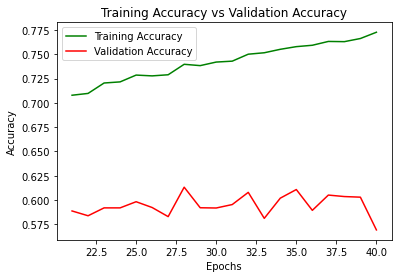

In [22]:
import matplotlib.pyplot as plt
acc_train=history_fine.history['accuracy']
acc_val=history_fine.history['val_accuracy']
epochs=range(21,41)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'r',label='Validation Accuracy')
plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

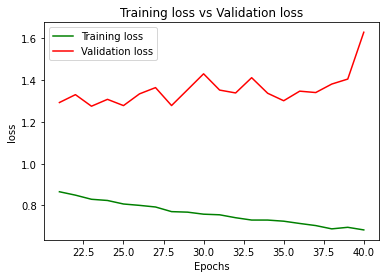

In [23]:
import matplotlib.pyplot as plt
loss_train=history_fine.history['loss']
loss_val=history_fine.history['val_loss']
epochs=range(21,41)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'r',label='Validation loss')
plt.title("Training loss vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# RESULT

In [29]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt

# ACCURACY OF TRAINING DATASET

In [26]:
model1.evaluate(training_set)

1143/1143 [==============================] - 378s 331ms/step - loss: 0.6857 - accuracy: 0.7698


[0.6857054233551025, 0.769798755645752]

# ACCURACY OF VALIDATION DATA

In [27]:
model.evaluate(test_set)

494/494 [==============================] - 76s 154ms/step - loss: 1.6289 - accuracy: 0.5693


[1.628855586051941, 0.5692931413650513]

[[9.0637350e-01 5.8585200e-03 1.2855453e-03 6.7030970e-04 2.6065657e-02
  3.7720296e-04 1.1979056e-03 6.0225180e-03 4.8765536e-02 3.3833513e-03]]
0


<function matplotlib.pyplot.show(close=None, block=None)>

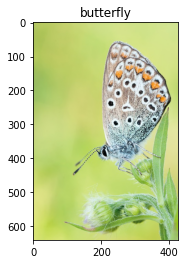

In [93]:
test_image=r'C:\Users\HP-PC\Desktop\Animal Classifier TRY\Real dataset\test\butterfly\B1.jpg'
save_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224,3))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)
result=np.argmax(result)
print(result)
classname=classes[result]
plt.imshow(save_image)
plt.title(classes[result])
plt.show

# CONFUSION MATRIX and CLASSIFICATION REPORT ON TEST DATA

In [94]:
ftest_generator = ImageDataGenerator(rescale=1./255)
ftest_data_generator = ftest_generator.flow_from_directory(
    r'C:\Users\HP-PC\Desktop\Animal Classifier TRY\Real dataset\test',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=16,
    )

Found 50 images belonging to 10 classes.


In [95]:
model1.evaluate(ftest_data_generator)

4/4 [==============================] - 2s 477ms/step - loss: 1.2504 - accuracy: 0.6600


[1.2504055500030518, 0.6600000262260437]

In [96]:
preclass=[0,0,0,0,0,1,1,1,1,1,3,3,0,0,2,3,3,3,3,3,4,4,4,4,2,6,5,5,9,5,6,5,6,6,6,6,7,7,9,7,0,0,6,0,8,4,9,8,9,8]

In [97]:
realclasses = ftest_data_generator.classes
realclasslabels = list(ftest_data_generator.class_indices.keys())   

In [99]:
import sklearn.metrics as metrics
report1 = metrics.classification_report(realclasses, preclass, target_names=realclasslabels)
print(report1)  

              precision    recall  f1-score   support

   butterfly       0.50      1.00      0.67         5
         cat       1.00      1.00      1.00         5
     chicken       0.50      0.20      0.29         5
         cow       0.71      1.00      0.83         5
         dog       0.80      0.80      0.80         5
    elephant       0.75      0.60      0.67         5
       horse       0.57      0.80      0.67         5
       sheep       1.00      0.60      0.75         5
      spider       0.33      0.20      0.25         5
    squirrel       0.50      0.40      0.44         5

    accuracy                           0.66        50
   macro avg       0.67      0.66      0.64        50
weighted avg       0.67      0.66      0.64        50



In [100]:
confusion_matrix = metrics.confusion_matrix(y_true=realclasses, y_pred=preclass)

In [101]:
confusion_matrix

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 3, 0, 1],
       [3, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 2, 2]], dtype=int64)